-0.5


c:\Users\leo_b\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


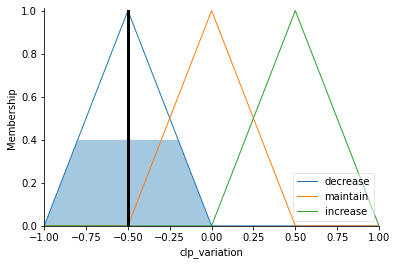

In [32]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definir as variáveis de entrada
memory_usage = ctrl.Antecedent(np.arange(0, 101, 1), 'memory_usage')
processor_load = ctrl.Antecedent(np.arange(0, 101, 1), 'processor_load')
output_bandwidth = ctrl.Antecedent(np.arange(0, 101, 1), 'output_bandwidth')
latency = ctrl.Antecedent(np.arange(0, 1001, 1), 'latency')
input_network_throughput = ctrl.Antecedent(np.arange(0, 101, 1), 'input_network_throughput')
output_network_throughput = ctrl.Antecedent(np.arange(0, 101, 1), 'output_network_throughput')

# Definir a variável de saída
clp_variation = ctrl.Consequent(np.arange(-1, 1.01, 0.01), 'clp_variation')


# Definir as funções de pertinência para cada variável
# Note: Os intervalos de pertinência e os termos usados podem variar dependendo do problema específico
memory_usage.automf(3, names=['low', 'medium', 'high'])
processor_load.automf(3, names=['low', 'medium', 'high'])
input_network_throughput.automf(3, names=['low', 'medium', 'high'])
output_network_throughput.automf(3, names=['low', 'medium', 'high'])
output_bandwidth.automf(3, names=['low', 'medium', 'high'])
latency.automf(3, names=['low', 'medium', 'high'])

# Agora, defina as funções de pertinência para a variável de saída
clp_variation['decrease'] = fuzz.trimf(clp_variation.universe, [-1  , -0.5, 0  ])
clp_variation['maintain'] = fuzz.trimf(clp_variation.universe, [-0.5, 0   , 0.5])
clp_variation['increase'] = fuzz.trimf(clp_variation.universe, [0   , 0.5 , 1  ])


rules = [
    #Increase CLP:
    #When the Memory Usage (%) is low and there is available memory capacity.
    #When the Processor Load (%) is low and there is available processing capacity.
    ctrl.Rule(memory_usage['low'] | processor_load['low'], clp_variation['increase']),
    #When the Input Network Throughput is high, indicating a significant amount of data being received.
    #When the Output Network Throughput is high, suggesting a need for increased computing power to handle the data being sent out.
    #When the Available Output Bandwidth is high, indicating sufficient capacity for transmitting processed data.
    
    #Maintain CLP:
    #When the Memory Usage (%) is average or within acceptable limits.
    #When the Processor Load (%) is average or within acceptable limits.
    ctrl.Rule(memory_usage['medium'] | processor_load['medium'], clp_variation['mantain']),
    #When the Input and Output Network Throughput are moderate, without extreme spikes or drops.
    #When the Available Output Bandwidth is sufficient for transmitting processed data without congestion.

    #Decrease CLP:
    #When the Memory Usage (%) is high, approaching or exceeding the device's memory capacity.
    #When the Processor Load (%) is high, approaching or exceeding the device's processing capacity.
    ctrl.Rule(memory_usage['high'] | processor_load['high'], clp_variation['decrease']),
    #When the Latency (mS) is high, suggesting potential delays in data transmission and the need for local processing.
    #When the Available Output Bandwidth is low, indicating congestion and limitations in transmitting data to external systems.
    
]

# Criar o sistema de controlo
clp_control_system = ctrl.ControlSystem(rules)

# Criar o simulador
clp_simulator = ctrl.ControlSystemSimulation(clp_control_system)

# Atualizar as variáveis 
clp_simulator.input['memory_usage'] = 70
clp_simulator.input['processor_load'] = 60
clp_simulator.input['input_network_throughput'] = 50
#clp_simulator.input['output_network_throughput'] = 40
clp_simulator.input['output_bandwidth'] = 30
#clp_simulator.input['latency'] = 200

# Executar a simulação
clp_simulator.compute()

print(clp_simulator.output['clp_variation'])

# Ver o resultado da simulação de clp_variation, e o que sugere
clp_variation.view(sim=clp_simulator)